### Importing Packages

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim 
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device is {device}')

device is cpu


### Data Loading

In [3]:
## Hyperparameters
batch_size_train = 16
batch_size_test = 32


# Dataloader
train_data = datasets.MNIST(root='data', train=True, transform=ToTensor(), download = True)
test_data = datasets.MNIST(root = 'data', train=False, transform=ToTensor())

train_loader = DataLoader(train_data, batch_size = batch_size_train, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size_test, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### Neural Network 

In [4]:
# Create CNN class:
class CNN_MNIST(nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1 , out_channels=2 , kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=2 , out_channels=4 , kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=4 , out_channels=8 , kernel_size=5)
        self.conv4 = nn.Conv2d(in_channels=8 , out_channels=16, kernel_size=5, stride=2)
        self.fc1 = nn.Linear(576,120)
        self.fc2 = nn.Linear(120, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = x.reshape(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return F.softmax(x, dim=1)

### Initializing Model

In [5]:
model = CNN_MNIST()
model.to(device)
learning_rate = 10e-6
momentum = 0.99
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

### Training Loop

In [6]:
def train(epoches):
  model.train()
  train_error = []
  for epoch in range(epoches):
    total_loss = 0
    n_batches = 0
    for i, (image, label) in enumerate(train_loader):
      n_batches += 1
      # Move tensor to the configured device
      image = image.to(device)
      label = label.to(device)

      # Forward pass
      output = model(image)
      loss = criterion(output, label)
      total_loss += loss.item()
      # Backward pass and optimizer
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    train_error.append(total_loss/n_batches)
    clear_output(wait=True)
    plt.plot(train_error)
    plt.xlabel('Number of Epoch')
    plt.ylabel('Training Error')
    plt.title(f'Training Error for Adam with Learning rate {learning_rate}')
    # plt.legend('Learning rate = 0.0001')
    # plt.legend('Train_batch_size = 8')
    plt.show()
    print(f'Epoch [{epoch}/{epoches}], Loss: {loss.item():.3f}')

  return train_error




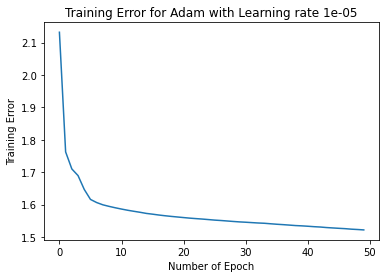

Epoch [49/50], Loss: 1.524


In [7]:
epoches = 50
train_error = train(epoches)

### Testing Loop

In [8]:
def test():
  model.eval()
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)
      output = model(images)
      predict = output.argmax(dim=1)
      correct += (predict == labels).sum().item()
      total += len(labels)
    print(f'Test accuracy:  {correct/total*100:.3f} %')

test()
      


Test accuracy:  94.240 %
